<a href="https://colab.research.google.com/github/PauloRhyanK/ProjetoeAnaliseAlgoritimos/blob/main/EXTRA_7_Canal_de_Matrizes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<html>
  <body>
    <header></header>
        <CENTER>
          <img src="https://uvv.br/wp-content/themes/core/dist/images/Logo@2x.png" alt="UVV-LOGO" style = width="100px"; height="100px">
        </CENTER>
        <CENTER><b>ESTRATÉGIA DE PROJETO</b></CENTER>
        <CENTER><b>PROGRAMAÇÃO DINÂMICA</b></CENTER>
        <CENTER><b>CANAL DE MATRIZES</b></CENTER><br/>

NOME:

LINK PARA MEU PRÓPRIO TRABALHO: [texto do link](https://colab.research.google.com/drive/15rdT4CtOlXaAaR895NS2Gjzw35b1nvsN?usp=sharing)

# Bibliotecas / funções:

In [1]:
import numpy as np
import pandas as pd
import math

In [2]:
D1 = np.random.randint(5, 16, 1)[0]
D2 = np.random.randint(5, 16, 1)[0]
D3 = np.random.randint(5, 16, 1)[0]
D4 = np.random.randint(5, 16, 1)[0]
N = 3 # NÚMERO DE MATRIZES: Instância N0

In [3]:
M1 = np.zeros((D1, D2), dtype=int)
M2 = np.zeros((D2, D3), dtype=int)
M3 = np.zeros((D3, D4), dtype=int)

In [4]:
M1.shape   # D1 X D2

(8, 14)

In [6]:
M2.shape   # D2 X D3

(14, 8)

In [7]:
M3.shape   # D3 X D4

(8, 11)

In [9]:
# MATRIZ DE CUSTO: M
M = np.zeros((N, N), dtype=int)
M

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

In [10]:
# MATRIZ DE ÍNDICES: S
S = np.zeros((N, N), dtype=int)
S

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

In [11]:
# VETOR DE DIMENSÕES: P
P = np.zeros(N + 1, dtype=int)
P = D1, D2, D3, D4
P

(np.int64(8), np.int64(14), np.int64(8), np.int64(11))

In [12]:
# VETOR DE DIMENSÕES: P
A = np.zeros(2 * N, dtype=int)
A = D1, D2, D2, D3, D3, D4
A

(np.int64(8),
 np.int64(14),
 np.int64(14),
 np.int64(8),
 np.int64(8),
 np.int64(11))

# IMPLEMENTAR: CANAL DE MATRIZES (N = 3 MATRIZES)

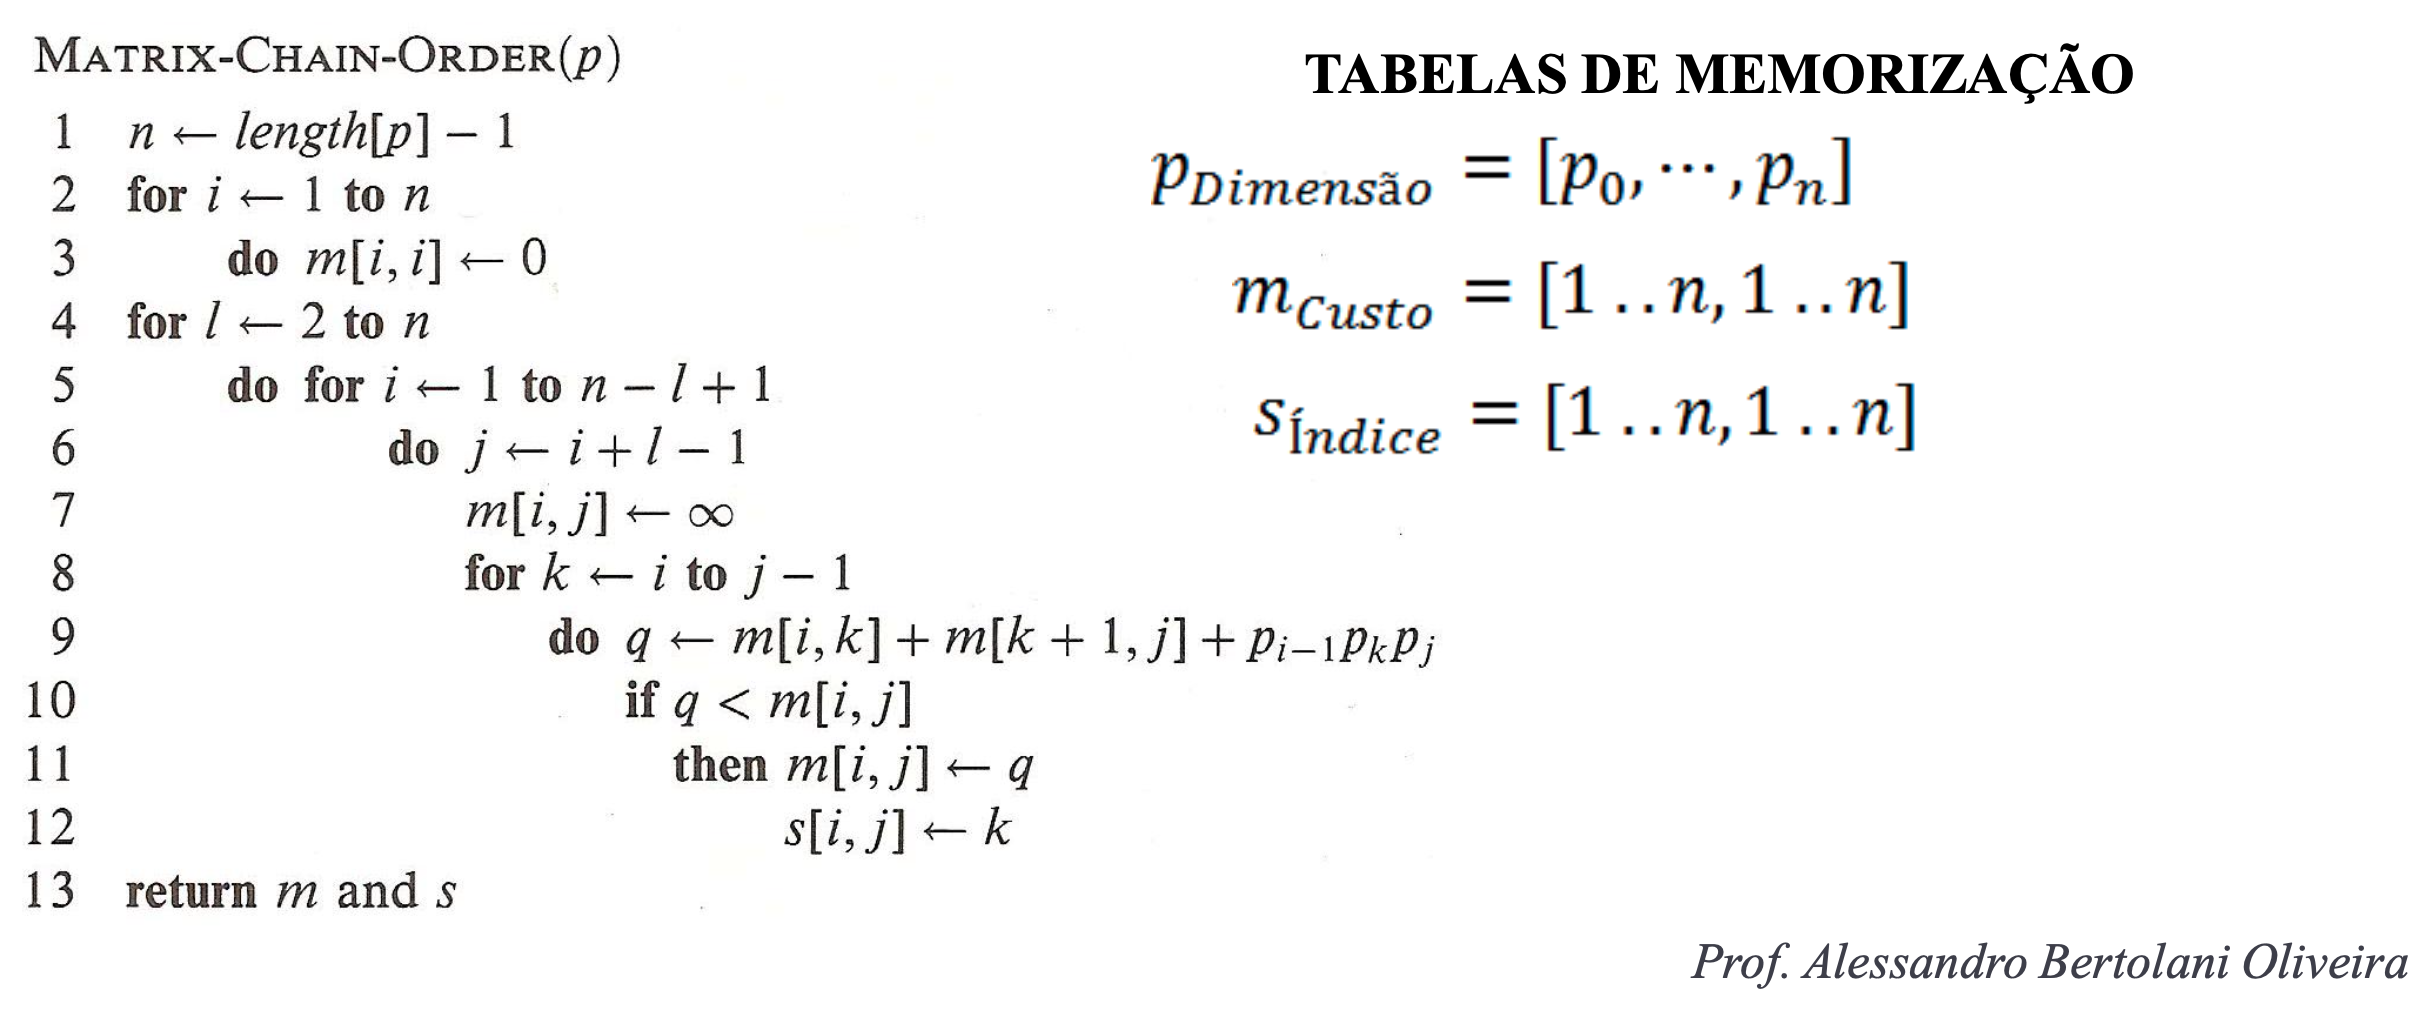

In [13]:
def MATRIX_CHAIN_ORDER(P):
    n = len(p) - 1  # número de matrizes

    # Inicializando as tabelas de memorização
    m = [[0 for _ in range(n)] for _ in range(n)]  # tabela de custo
    s = [[0 for _ in range(n)] for _ in range(n)]  # tabela de índice

    # Preenchendo tabela principal
    for l in range(2, n + 1):  # l é o tamanho da cadeia
        for i in range(0, n - l + 1):
            j = i + l - 1
            m[i][j] = float('inf')  # inicializa com infinito
            for k in range(i, j):
                q = m[i][k] + m[k + 1][j] + p[i] * p[k + 1] * p[j + 1]
                if q < m[i][j]:
                    m[i][j] = q
                    s[i][j] = k

    return m, s

In [22]:
def print_optimal_parens(s, i, j):
    if i == j:
        print(f"A{i+1}", end="")
    else:
        print("(", end="")
        print_optimal_parens(s, i, s[i][j])
        print_optimal_parens(s, s[i][j] + 1, j)
        print(")", end="")



In [23]:
p = [30, 35, 15, 5, 10, 20, 25]
m, s = MATRIX_CHAIN_ORDER(p)

print("Matriz de custos mínimos:")
for row in m:
    print(row)

print("\nMatriz de índices:")
for row in s:
    print(row)

print("\nParentização ótima:")
print_optimal_parens(s, 0, len(p) - 2)
print()

Matriz de custos mínimos:
[0, 15750, 7875, 9375, 11875, 15125]
[0, 0, 2625, 4375, 7125, 10500]
[0, 0, 0, 750, 2500, 5375]
[0, 0, 0, 0, 1000, 3500]
[0, 0, 0, 0, 0, 5000]
[0, 0, 0, 0, 0, 0]

Matriz de índices:
[0, 0, 0, 2, 2, 2]
[0, 0, 1, 2, 2, 2]
[0, 0, 0, 2, 2, 2]
[0, 0, 0, 0, 3, 4]
[0, 0, 0, 0, 0, 4]
[0, 0, 0, 0, 0, 0]

Parentização ótima:
((A1(A2A3))((A4A5)A6))


## Matrix_Multiply(X, Y)

In [24]:
# This function multiplies the matrices of way conventional.
def Matrix_Multiply(A, B):
  C = np.zeros((D1, D2))
  for i in range (len(A)):
    for j in range (len(B)):
      for k in range (len(C)):
        C[i, j] = C[i, j] + A[i, k] * B[k, j];
  return C

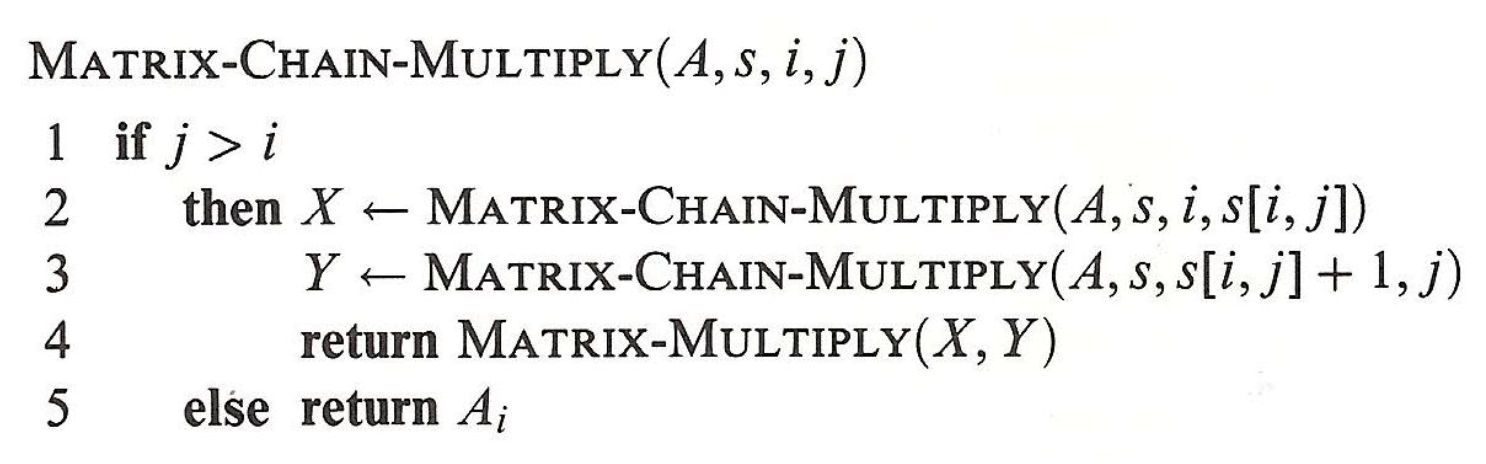

In [21]:
# Função para multiplicar efetivamente as matrizes na ordem ótima
def matrix_chain_multiply(A, s, i, j):
    if i == j:
        return A[i]  # Retorna a matriz Ai original
    else:
        # Divide conforme a tabela s
        X = matrix_chain_multiply(A, s, i, s[i][j])
        Y = matrix_chain_multiply(A, s, s[i][j] + 1, j)
        return np.dot(X, Y)  # Multiplicação efetiva das duas matrizes

# Exemplo de uso:

# Definindo matrizes de exemplo
A1 = np.random.randint(1, 10, (30, 35))
A2 = np.random.randint(1, 10, (35, 15))
A3 = np.random.randint(1, 10, (15, 5))
A4 = np.random.randint(1, 10, (5, 10))
A5 = np.random.randint(1, 10, (10, 20))
A6 = np.random.randint(1, 10, (20, 25))

# Lista de matrizes
matrices = [A1, A2, A3, A4, A5, A6]

# Dimensões
p = [30, 35, 15, 5, 10, 20, 25]

# Calculando a ordem ótima
m, s = MATRIX_CHAIN_ORDER(p)

# Multiplicação ótima efetiva
result = matrix_chain_multiply(matrices, s, 0, len(matrices) - 1)

print("Resultado final da multiplicação ótima (dimensões):", result.shape)

Resultado final da multiplicação ótima (dimensões): (30, 25)


# Referência Bibliográfica:

<div class="hint">
        <b>APRENDA+ :</b><br/>
        &#10139; Livro Numeric Python (Travis E. Oliphant):
        <a href="https://web.mit.edu/dvp/Public/numpybook.pdf">Link<a><br/>
        &#10139; Livro Wes McKinney:
        <a href="https://www.cin.ufpe.br/~embat/Python%20for%20Data%20Analysis.pdf">Link<a><br/>
        &#10139; Biblioteca Numeric Python:
        <a href="https://numpy.org/doc/1.17/index.html">Link<a><br/>
        &#10139; Conceitos de <b>Arranjo</b>:
        <a href="https://pt.wikipedia.org/wiki/Arranjo_(computação)">Link</a><br/>
        &#10139; Site oficial <b>Python</b>:
        <a href="https://www.python.org/">Link</a><br/>
        &#10139; Bibliotecas (Library) do <b>Python</b>:
        <a href="https://docs.python.org/3.8/library/index.html?highlight=library">Link</a><br/>
    </div>